In [1]:
#from __future__ import print_function
import sys
sys.path.append('/Users/carlosbelardi/miniconda3/lib/python3.7/site-packages'),
import vamp
import librosa
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
from IPython.display import Audio


In [2]:
audio, sr = librosa.load('InMyFeelings.wav', sr=44100, mono=True)
#Audio(audio, rate=sr)

In [3]:
data = vamp.collect(audio, sr, "mtg-melodia:melodia")
# data is a dictionary containing one item called "vector"
# vector is a tuple of two values: the hop size used for analysis and the array of pitch values
# Note that the hop size is *always* equal to 128/44100.0 = 2.9 ms
hop_imf, melody_imf = data['vector']
# print(hop_imf)
# print(melody_imf)

def ExtractMelody(song_audio,song_sr):
    data = vamp.collect(song_audio, song_sr, "mtg-melodia:melodia")
    song_hop, song_melody = data['vector']
    return song_hop, song_melody

[2.32199546e-02 2.61224490e-02 2.90249433e-02 ... 2.17957007e+02
 2.17959909e+02 2.17962812e+02]


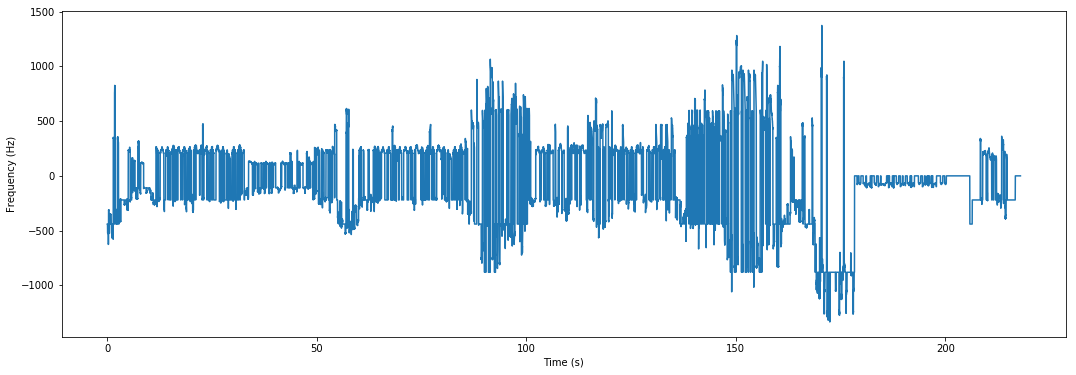

In [4]:
import numpy as np
timestamps = 8 * 128/44100.0 + np.arange(len(melody_imf)) * (128/44100.0)
print(timestamps)
# Melodia returns unvoiced (=no melody) sections as negative values. So by default, we get:
plt.figure(figsize=(18,6))
plt.plot(timestamps, melody_imf)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

In [55]:
def comparison(hum_string,song_db):
    #hum_string and song_db are strings with the 'u', 'd', 's'
    
    #song_db is a dictionary with song names being the key and the same string... 
    #format as hum_string (but for the current song) for the entire song
    
    #returns array with names of top 3 songs
    hum_string = np.array(hum_string)
    song_scores = {}
    for song_name,song_string in song_db.items():
        chunk_len = len(hum_string)
        curr_song_scores = []
        for i in range(len(song_string)-chunk_len):
            curr_chunk = np.array(song_string[i:chunk_len+i])
            curr_song_scores.append(len(np.where(curr_chunk==hum_string)[0]))   
        song_scores[song_name] = max(curr_song_scores)
    print(song_scores)
    counted_song_scores = Counter(song_scores)
    top_3 = counted_song_scores.most_common(3)
    top_3_names = [key for key, val in top_3]
    return top_3_names

In [6]:
def Aud2Str(melody, threshold=1):
    string_out = []
    prev = melody[0]
    for i in range(1,len(melody)):
        curr = melody[i]
        diff = curr - prev
        # if curr < 0 means non-melody section, so we skip
        if curr >= 0:
            s = 's'
            if abs(diff) > threshold:
                s = 'u' if diff>0 else 'd'
                prev = curr
            string_out.append(s)
    return string_out

In [7]:
# melody is what vamp.collect() returns in data[vector], i.e. melody data
# default vamp hop size is 128/44100
# need to parse data according to desired_hop (in seconds)
# returns melody_desired
def parseMelody(melody, desired_hop):
    default_hop = 128/44100
    jump = int(desired_hop/default_hop)
    index = 0
    melody_desired = []
    while index < len(melody):
        melody_desired.append(melody[index])
        index = index + jump
    melody_desired = np.array(melody_desired)
    return melody_desired

In [35]:
# example of how to parse melody data
# audio = audio[0:15*44100]  #if you want to analyze only section of song

#data = vamp.collect(audio, sr, "mtg-melodia:melodia")
# data is a dictionary containing one item called "vector"
# vector is a tuple of two values: the hop size used for analysis and the array of pitch values
# Note that the hop size is *always* equal to 128/44100.0 = 2.9 ms

# hop = 0.25  #desired hop in seconds
# melody = parseMelody(melody_imf, hop_imf)

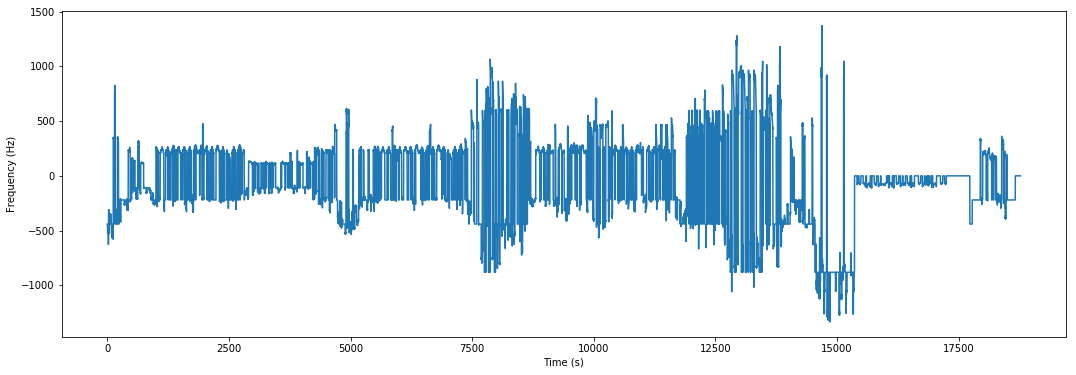

In [12]:
timestamps = 8 * 128/44100.0 + np.arange(len(melody_imf)) * 0.25
# Melodia returns unvoiced (=no melody) sections as negative values. So by default, we get:
plt.figure(figsize=(18,6))
plt.plot(timestamps, melody_imf)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
# plt.xlim(0, 15)
plt.show()

In [79]:
#Song Database Creation
threshold = 1  # play with this to see how it affects performance- essentially if this is high, only larger melody changes will be noted
hop = 0.1  #desired hop in seconds
#final_melody_imf = parseMelody(melody_imf, hop) 
#melody = In My Feelings at this point
song_DB = {}
final_melody_imf = parseMelody(melody_imf, hop) 
song_DB['In My Feeelings'] = Aud2Str(final_melody_imf, threshold)



audio_sc, sr_sc = librosa.load('SweetCaroline.wav', sr=44100, mono=True)
data_sc = vamp.collect(audio_sc, sr_sc, "mtg-melodia:melodia")
hop_sc, melody_sc = data_sc['vector']
final_melody_sc = parseMelody(melody_sc, hop) 
song_DB['Sweet Caroline'] = Aud2Str(final_melody_sc, threshold)

audio_fgi, sr_fgi = librosa.load('FeelGoodInc.wav', sr=44100, mono=True)
data_fgi = vamp.collect(audio_fgi, sr_fgi, "mtg-melodia:melodia")
hop_fgi, melody_fgi = data_fgi['vector']
final_melody_fgi = parseMelody(melody_fgi, hop) 
song_DB['Feel Good Inc'] = Aud2Str(final_melody_fgi, threshold)


audio_ss, sr_ss = librosa.load('SummertimeSadness.wav', sr=44100, mono=True)
data_ss = vamp.collect(audio_ss, sr_ss, "mtg-melodia:melodia")
hop_ss, melody_ss = data_ss['vector']
final_melody_ss = parseMelody(melody_ss, hop) 
song_DB['Summertime Sadness'] = Aud2Str(final_melody_ss, threshold)

audio_cmm, sr_cmm = librosa.load('CallMeMaybe.wav', sr=44100, mono=True)
data_cmm = vamp.collect(audio_cmm, sr_cmm, "mtg-melodia:melodia")
hop_cmm, melody_cmm = data_cmm['vector']
final_melody_cmm = parseMelody(melody_cmm, hop) 
song_DB['Call Me Maybe'] = Aud2Str(final_melody_cmm, threshold)

audio_b, sr_b = librosa.load('Believe.wav', sr=44100, mono=True)
hop_b, melody_b = ExtractMelody(audio_b, sr_b)
final_melody_b = parseMelody(melody_b, hop)
song_DB['Believe'] = Aud2Str(final_melody_b,threshold)

audio_f, sr_f = librosa.load('Firework.wav', sr=44100, mono=True)
hop_f, melody_f = ExtractMelody(audio_f, sr_f)
final_melody_f = parseMelody(melody_f, hop)
song_DB['Firework'] = Aud2Str(final_melody_f,threshold)

audio_cr, sr_cr = librosa.load('CountryRoads.wav', sr=44100, mono=True)
hop_cr, melody_cr = ExtractMelody(audio_cr, sr_cr)
final_melody_cr = parseMelody(melody_cr, hop)
song_DB['Take Me Home, Country Roads'] = Aud2Str(final_melody_cr,threshold)

audio_sog, sr_sog = librosa.load('StayOrGo.wav', sr=44100, mono=True)
hop_sog, melody_sog = ExtractMelody(audio_sog, sr_sog)
final_melody_sog = parseMelody(melody_sog, hop)
song_DB['Should I Stay or Should I Go'] = Aud2Str(final_melody_sog,threshold)

audio_tom, sr_tom = librosa.load('TakeOnMe.wav', sr=44100, mono=True)
hop_tom, melody_tom = ExtractMelody(audio_tom, sr_tom)
final_melody_tom = parseMelody(melody_tom, hop)
song_DB['Take on Me'] = Aud2Str(final_melody_tom,threshold)

#print(song_DB)


In [80]:
#Import humming samples
hum_sc, sr_sc_hum = librosa.load('SweetCarolineHum.wav', sr=44100, mono=True)
hum_fgi, sr_fgi_hum = librosa.load('FeelGoodIncHum.wav', sr=44100, mono=True)
hum_cmm, sr_cmm_hum = librosa.load('CallMeMaybeHum.wav', sr=44100, mono=True)


#Get Harmonies out of test humming samples
hop_sc_hum,melody_hum_sc = ExtractMelody(hum_sc,sr_sc_hum)
final_melody_hum_sc = parseMelody(melody_hum_sc, 0.075)
hum_sc_str = Aud2Str(final_melody_hum_sc,1)
#print(hum_sc_str)

hop_fgi_hum,melody_hum_fgi = ExtractMelody(hum_fgi,sr_fgi_hum)
final_melody_hum_fgi = parseMelody(melody_hum_fgi, 0.075)
hum_fgi_str = Aud2Str(final_melody_hum_fgi,1)
#print(hum_fgi_str)

hop_cmm_hum,melody_hum_cmm = ExtractMelody(hum_cmm,sr_cmm_hum)
final_melody_hum_cmm = parseMelody(melody_hum_cmm, 0.075)
hum_cmm_str = Aud2Str(final_melody_hum_cmm,1)

test_sc = comparison(hum_sc_str,song_DB)
print(test_sc)
print('')
test_fgi = comparison(hum_fgi_str,song_DB)
print(test_fgi)
print('')
test_cmm = comparison(hum_cmm_str,song_DB)
print(test_cmm)

{'In My Feeelings': 49, 'Sweet Caroline': 53, 'Feel Good Inc': 51, 'Summertime Sadness': 49, 'Call Me Maybe': 49, 'Believe': 49, 'Firework': 50, 'Take Me Home, Country Roads': 53, 'Should I Stay or Should I Go': 50, 'Take on Me': 50}
['Sweet Caroline', 'Take Me Home, Country Roads', 'Feel Good Inc']

{'In My Feeelings': 84, 'Sweet Caroline': 83, 'Feel Good Inc': 81, 'Summertime Sadness': 80, 'Call Me Maybe': 79, 'Believe': 81, 'Firework': 77, 'Take Me Home, Country Roads': 77, 'Should I Stay or Should I Go': 79, 'Take on Me': 77}
['In My Feeelings', 'Sweet Caroline', 'Feel Good Inc']

{'In My Feeelings': 51, 'Sweet Caroline': 47, 'Feel Good Inc': 49, 'Summertime Sadness': 51, 'Call Me Maybe': 53, 'Believe': 50, 'Firework': 48, 'Take Me Home, Country Roads': 49, 'Should I Stay or Should I Go': 50, 'Take on Me': 50}
['Call Me Maybe', 'In My Feeelings', 'Summertime Sadness']
